In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# โหลดข้อมูล 
df = pd.read_csv("output3.csv")

In [49]:
# ดูขนาดของข้อมูล
print("Shape of dataset:", df.shape)

Shape of dataset: (7525, 23)


In [50]:
# ดูตัวอย่างข้อมูล 5 แถวแรก
print("\nSample data:")
print(df.head())


Sample data:
   SEX  AGE  Injp  Risk1  Risk2  Risk4  Risk5  Ais1  Ais2  Ais3  ...  GCS  \
0    2   52     3      2      2      2      2     1     3     2  ...    3   
1    1   35     2      1      0      0      0     1     3     2  ...    4   
2    1   17     2      0      2      0      0     1     2     3  ...    3   
3    1   24     2      1      0      2      2     1     2     1  ...    4   
4    1   20     2      1      0      0      0     0     1     1  ...    2   

   SBP  RR   PR   Time  Dead  ISS   RTS  SBP_group  RR_group  
0  125  20  125  284.0     1   14  6.61          4         3  
1  172  20   54  181.0     1   14  7.55          4         3  
2  140  20  112  206.0     1   14  6.61          4         3  
3   89  18  135  471.0     1    6  6.82          3         3  
4  155  28  135  480.0     1    6  5.68          4         3  

[5 rows x 23 columns]


In [51]:
# ดูข้อมูลเบื้องต้น (ชนิดข้อมูล, ค่าที่หายไป, memory)
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEX        7525 non-null   int64  
 1   AGE        7525 non-null   int64  
 2   Injp       7525 non-null   int64  
 3   Risk1      7525 non-null   int64  
 4   Risk2      7525 non-null   int64  
 5   Risk4      7525 non-null   int64  
 6   Risk5      7525 non-null   int64  
 7   Ais1       7525 non-null   int64  
 8   Ais2       7525 non-null   int64  
 9   Ais3       7525 non-null   int64  
 10  Ais4       7525 non-null   int64  
 11  Ais5       7525 non-null   int64  
 12  Ais6       7525 non-null   int64  
 13  GCS        7525 non-null   int64  
 14  SBP        7525 non-null   int64  
 15  RR         7525 non-null   int64  
 16  PR         7525 non-null   int64  
 17  Time       7525 non-null   float64
 18  Dead       7525 non-null   int64  
 19  ISS        7525 non-null   int64  
 20  R

In [52]:
# ดูสถิติเบื้องต้น (เฉลี่ย, sd, min, max, quartile)
print("\nDescribe:")
print(df.describe(include="all"))


Describe:
               SEX          AGE         Injp        Risk1        Risk2  \
count  7525.000000  7525.000000  7525.000000  7525.000000  7525.000000   
mean      1.206113    35.600266     2.094485     0.651694     1.921595   
std       0.404539    18.240440     0.400329     0.755284     0.388179   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%       1.000000    20.000000     2.000000     0.000000     2.000000   
50%       1.000000    32.000000     2.000000     0.000000     2.000000   
75%       1.000000    49.000000     2.000000     1.000000     2.000000   
max       2.000000    93.000000     3.000000     2.000000     2.000000   

             Risk4        Risk5         Ais1         Ais2         Ais3  ...  \
count  7525.000000  7525.000000  7525.000000  7525.000000  7525.000000  ...   
mean      0.544585     0.270033     0.750432     2.276811     1.737674  ...   
std       0.852826     0.682750     0.432792     1.091044     1.153213  ...   
min   

In [53]:
# ตรวจสอบ missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
SEX          0
AGE          0
Injp         0
Risk1        0
Risk2        0
Risk4        0
Risk5        0
Ais1         0
Ais2         0
Ais3         0
Ais4         0
Ais5         0
Ais6         0
GCS          0
SBP          0
RR           0
PR           0
Time         0
Dead         0
ISS          0
RTS          0
SBP_group    0
RR_group     0
dtype: int64



Target distribution:
Dead
1    6644
0     881
Name: count, dtype: int64


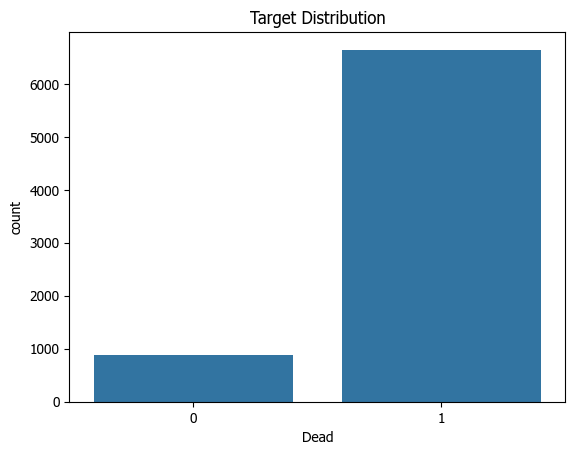

In [54]:
# ตรวจสอบ class balance 
if "Dead" in df.columns:
    print("\nTarget distribution:")
    print(df["Dead"].value_counts())

    sns.countplot(x="Dead", data=df)
    plt.title("Target Distribution")
    plt.show()

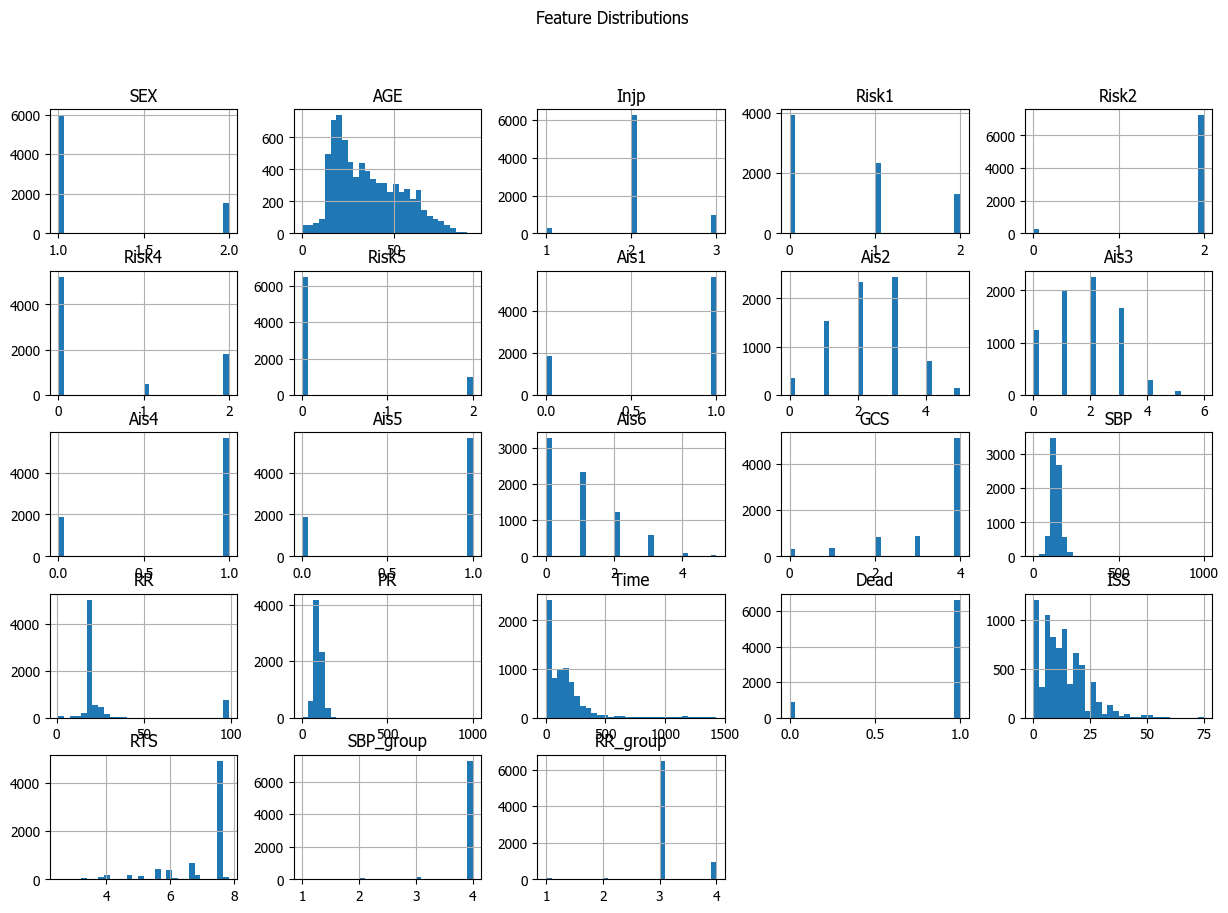

In [55]:
# ดูการกระจายของตัวแปรเชิงตัวเลข
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

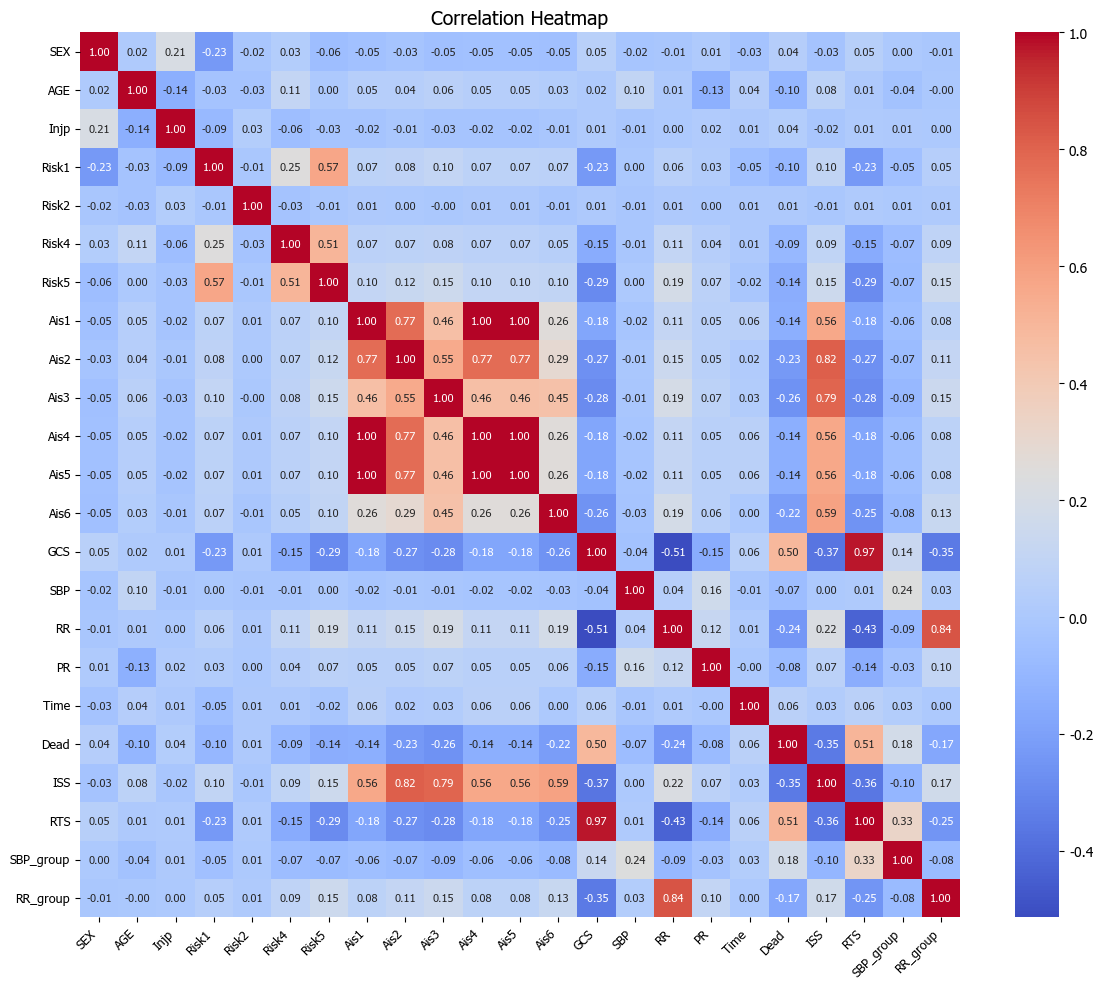

In [56]:
# ดูความสัมพันธ์ (Correlation Matrix)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))  # ขยายขนาดรูป
corr = df.corr()

sns.heatmap(
    corr,
    annot=True,          # แสดงตัวเลข
    fmt=".2f",           # ให้มีทศนิยม 2 ตำแหน่ง
    cmap="coolwarm",     # สีฟ้า-แดง
    annot_kws={"size":8} # ลดขนาดฟอนต์ตัวเลข
)

plt.xticks(rotation=45, ha="right", fontsize=9)  # หมุนชื่อแกน X
plt.yticks(fontsize=9)                           # ปรับขนาดชื่อแกน Y
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()  # จัด layout ให้ไม่ทับกัน
plt.show()

In [57]:
# การทำ ANOVA
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif

# --------------------
# 1) โหลดข้อมูล
df = pd.read_csv('output3.csv')

# Target = Dead (0 = เสียชีวิต, 1 = รอดชีวิต)
X = df.drop('Dead', axis=1)
y = df['Dead']

# --------------------
# 2) คำนวณค่า F-statistic และ p-value ด้วย ANOVA F-test
F_values, p_values = f_classif(X, y)

# --------------------
# 3) รวมค่าเป็นตาราง DataFrame
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-statistic': F_values,
    'p-value': p_values
}).sort_values(by='p-value')

# เพิ่มคอลัมน์บอกว่ามีนัยสำคัญทางสถิติหรือไม่ (p ≤ 0.05)
anova_df['Significant (p≤0.05)'] = np.where(anova_df['p-value'] <= 0.05, 'Yes', 'No')

# --------------------
# 4) แสดงผลใน console
print("\n=== ANOVA Feature Selection Results ===")
print(anova_df)

# --------------------
# 5) เลือกเฉพาะฟีเจอร์ที่มีนัยสำคัญทางสถิติ (p ≤ 0.05)
significant_features = anova_df[anova_df['p-value'] <= 0.05]['Feature'].tolist()
removed_features = anova_df[anova_df['p-value'] > 0.05]['Feature'].tolist()

print(f"\nจำนวนฟีเจอร์ทั้งหมดก่อนคัดเลือก: {X.shape[1]}")
print(f"จำนวนฟีเจอร์ที่เหลือหลังคัดเลือก: {len(significant_features)}")
print(f"จำนวนฟีเจอร์ที่ถูกตัดออก: {len(removed_features)}")

print("\nฟีเจอร์ที่เหลือ (สำคัญ):", significant_features)
print("\nฟีเจอร์ที่ถูกตัดออก:", removed_features)

# --------------------
# 6) บันทึกตารางผล ANOVA เป็น Excel
output_file = 'anova_feature_selection_results.xlsx'
anova_df.to_excel(output_file, index=False)

print(f"\n✅ บันทึกตารางผล ANOVA เป็นไฟล์ Excel เรียบร้อยแล้ว: {output_file}")

# --------------------
# 7) บันทึกเฉพาะฟีเจอร์สำคัญ + target สำหรับใช้สร้างโมเดล
df_selected = df[significant_features + ['Dead']]
df_selected.to_csv('selected_features.csv', index=False)
print("\n✅ บันทึกไฟล์ 'selected_features.csv' สำหรับใช้สร้างโมเดลเรียบร้อยแล้ว")



=== ANOVA Feature Selection Results ===
      Feature  F-statistic        p-value Significant (p≤0.05)
13        GCS  2459.566707   0.000000e+00                  Yes
19        RTS  2600.098057   0.000000e+00                  Yes
18        ISS  1063.126444  3.043965e-218                  Yes
9        Ais3   556.367547  9.749440e-119                  Yes
15         RR   461.214343   2.401953e-99                  Yes
8        Ais2   439.524786   6.826322e-95                  Yes
12       Ais6   371.591595   7.338960e-81                  Yes
20  SBP_group   251.675413   8.924334e-56                  Yes
21   RR_group   231.411245   1.704169e-51                  Yes
6       Risk5   158.280866   6.170972e-36                  Yes
10       Ais4   144.777503   4.824043e-33                  Yes
7        Ais1   144.777503   4.824043e-33                  Yes
11       Ais5   144.777503   4.824043e-33                  Yes
1         AGE    77.437786   1.677993e-18                  Yes
3       Risk1 

In [58]:
# ตั้งค่าให้กราฟมีภาษาไทย
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

# 🔹 ถ้าใช้ Windows → มี Tahoma อยู่แล้ว
rcParams['font.family'] = 'Tahoma'

# 🔹 ถ้าใช้ Colab/Jupyter ให้ใช้ TH Sarabun (ต้องติดตั้งฟอนต์ก่อน)
# rcParams['font.family'] = 'TH Sarabun New'

# 🔹 ห้ามมีสี่เหลี่ยมหรือภาษาเพี้ยน
rcParams['axes.unicode_minus'] = False

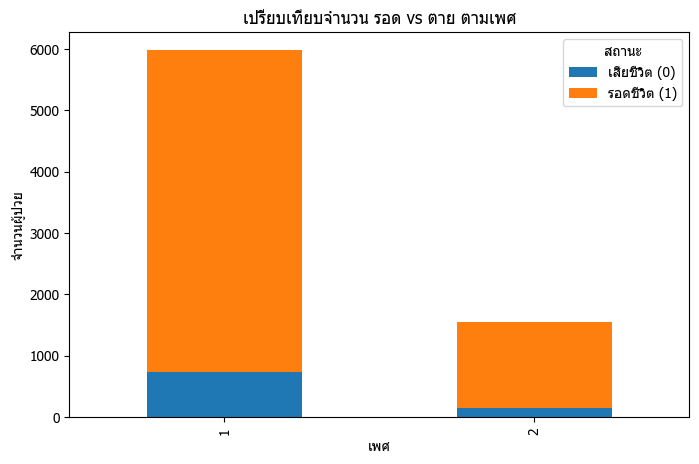

In [59]:
# ดูว่าเพศมีผลต่อการรอดมั้ย
# 1=ชาย 2=หญิง
import pandas as pd
import matplotlib.pyplot as plt

# ✅ นับจำนวนรอดและตายตามเพศ
survival_counts = df.groupby('SEX')['Dead'].value_counts().unstack()

# ✅ ใช้ฟอนต์ไทย (Windows: Tahoma)
rcParams['font.family'] = 'Tahoma'
rcParams['axes.unicode_minus'] = False

# ✅ ตั้งชื่อคอลัมน์
survival_counts.columns = ['เสียชีวิต (0)', 'รอดชีวิต (1)']

# ✅ วาดกราฟ
survival_counts.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title("เปรียบเทียบจำนวน รอด vs ตาย ตามเพศ")
plt.xlabel("เพศ")
plt.ylabel("จำนวนผู้ป่วย")
plt.legend(title="สถานะ")
plt.show()



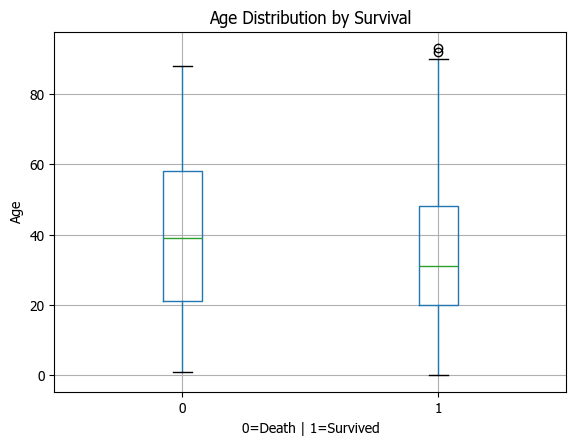

In [60]:
df.boxplot(column='AGE', by='Dead')
plt.title("Age Distribution by Survival")
plt.suptitle("")  # เอาหัวซ้ำออก
plt.xlabel("0=Death | 1=Survived")
plt.ylabel("Age")
plt.show()


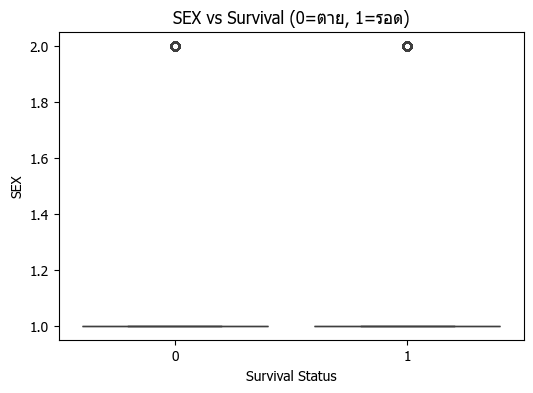

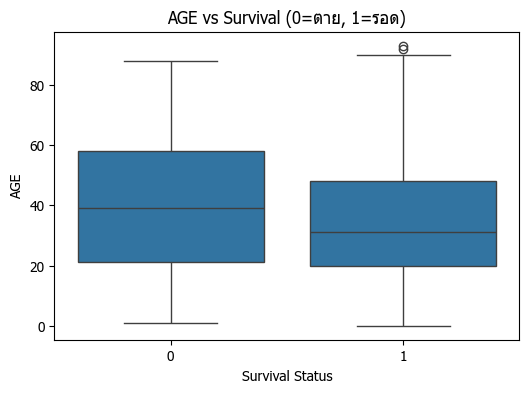

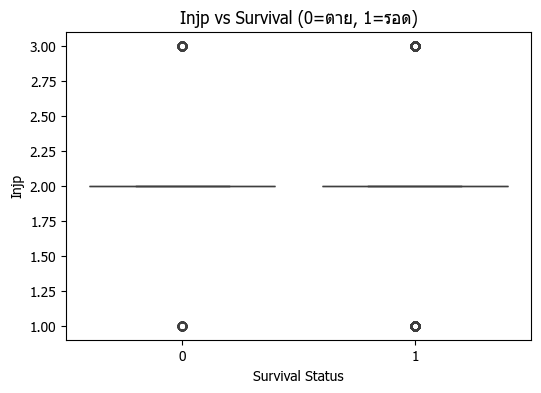

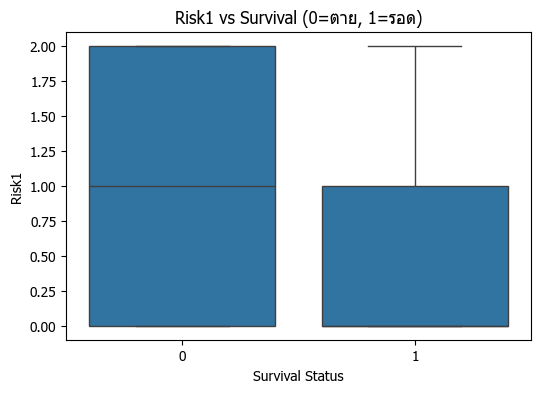

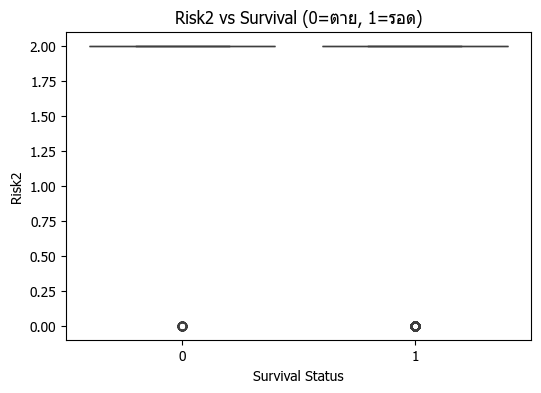

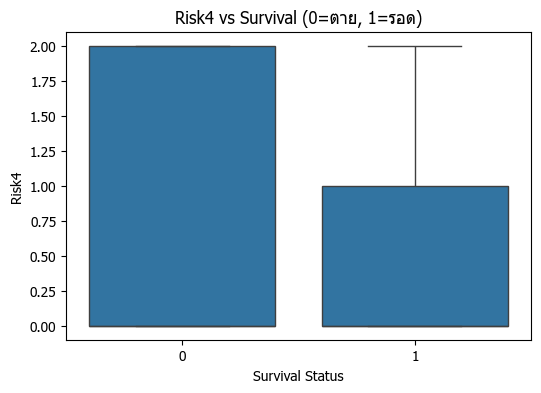

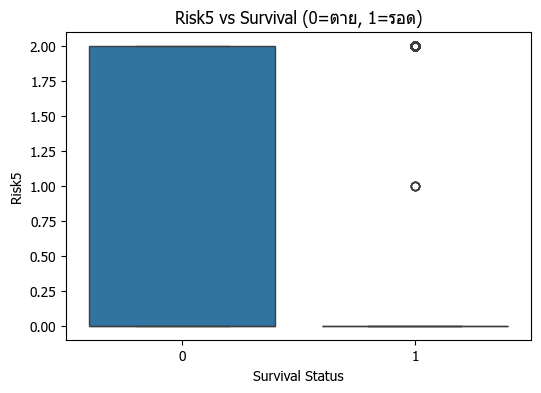

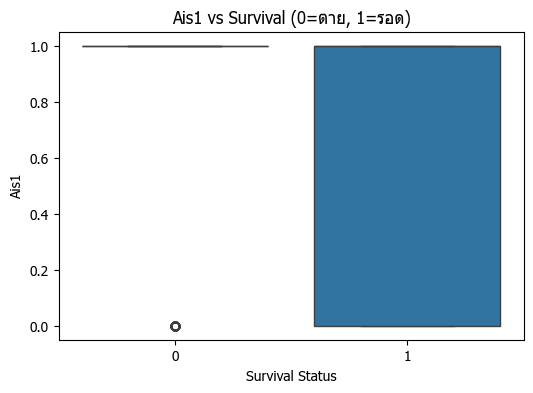

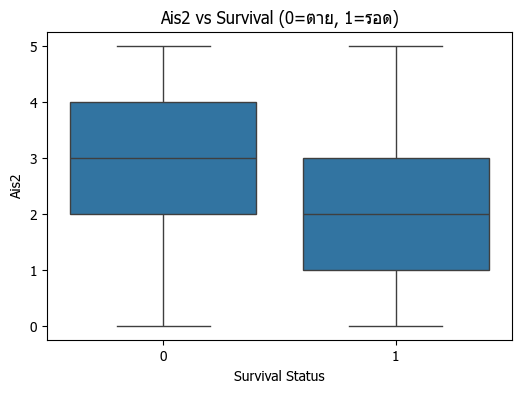

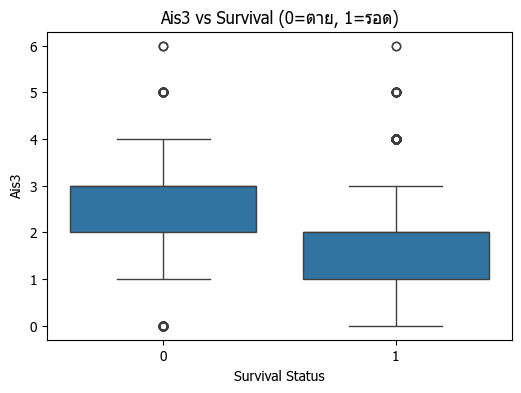

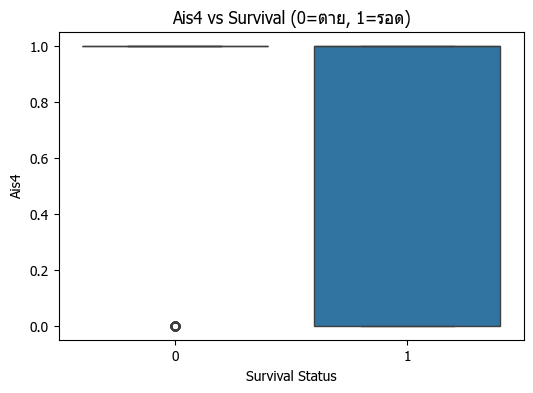

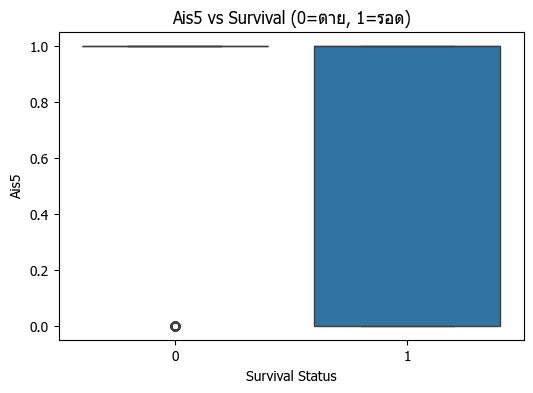

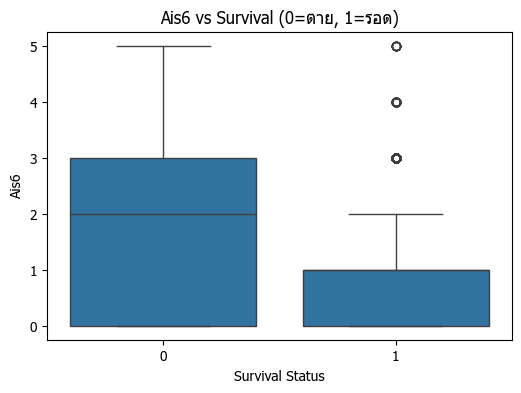

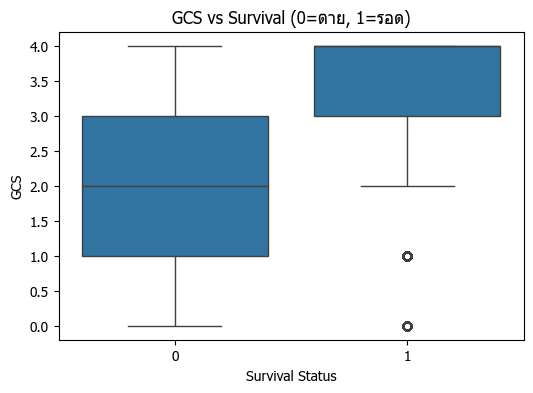

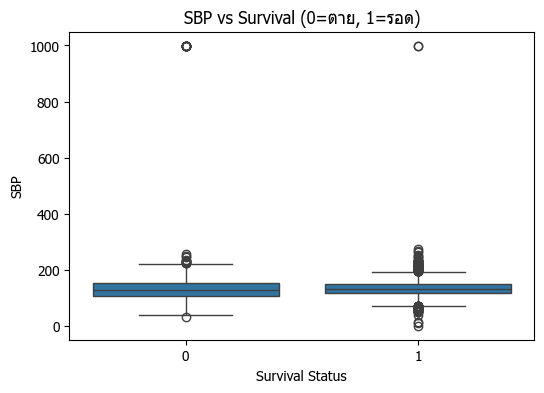

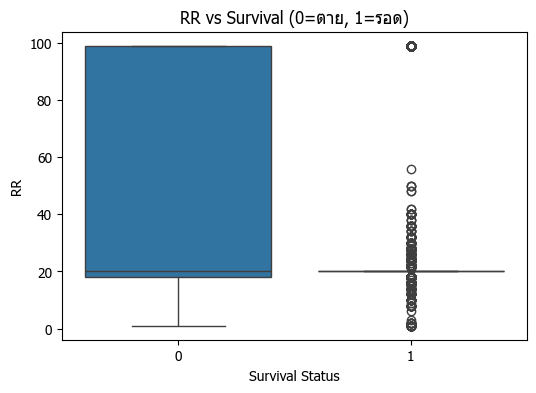

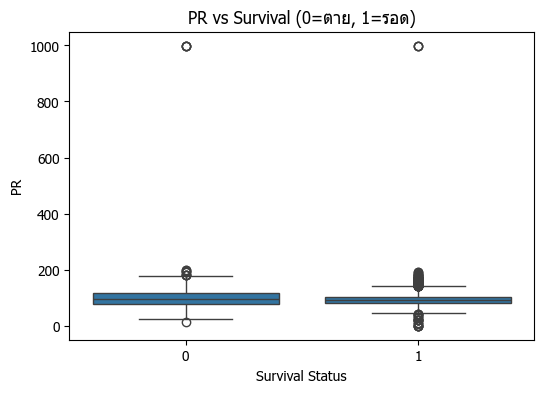

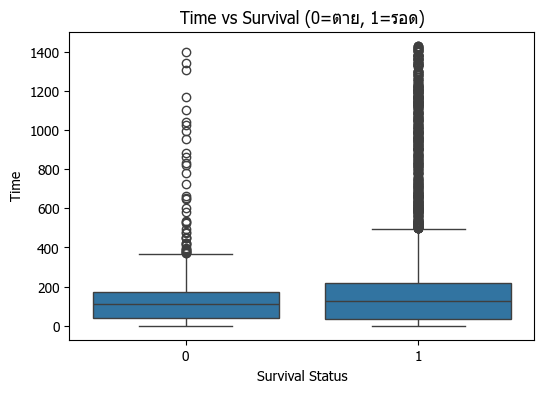

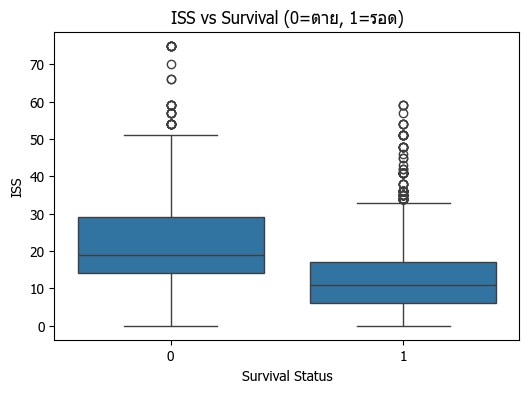

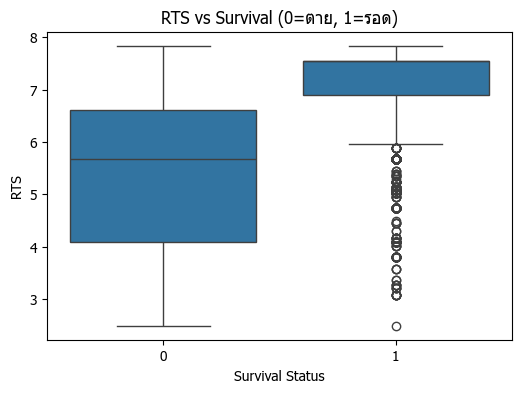

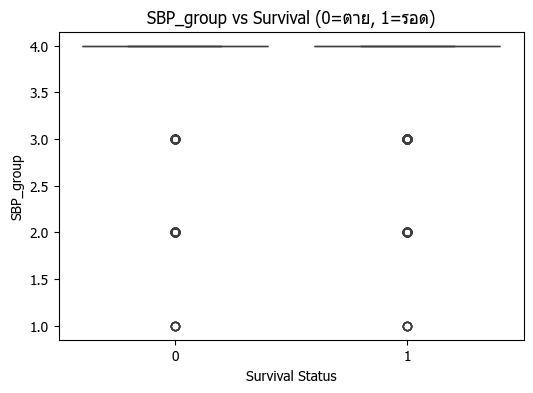

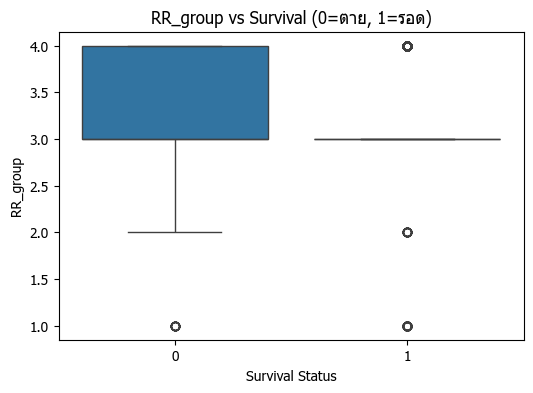

In [61]:
# ทำกราฟเปรียบเทียบ
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าฟอนต์ไทย (กรณีเป็นภาษาไทย)
import matplotlib
matplotlib.rc('font', family='Tahoma')  # ถ้าใช้ Colab ให้เปลี่ยนเป็น 'TH Sarabun New'

# ============================
# 1) แยกประเภทข้อมูล
# ============================
target = 'Dead'   # หรือ 'Dead' ถ้าใช้ชื่อนี้
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
categorical_features = df.select_dtypes(include=['object']).columns

# ============================
# 2) กราฟสำหรับตัวเลข → Boxplot
# ============================
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f"{col} vs Survival (0=ตาย, 1=รอด)")
    plt.xlabel("Survival Status")
    plt.ylabel(col)
    plt.show()

# ============================
# 3) กราฟสำหรับตัวแปรจำแนก → Bar Chart
# ============================
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], hue=df[target])
    plt.title(f"Survival Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Survival (0=ตาย, 1=รอด)')
    plt.xticks(rotation=45)
    plt.show()


In [62]:
# K=10 การลองทำครั้งแรกเมื่อยังไม่ได้ตัดข้อมูลสักตัว
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop('Dead', axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9292
Recall (class=1): 0.9669
Recall (class=0): 0.4432
Recall (class=1): 0.9669
F1-score: 0.9477
AUC: 0.9031
Confusion Matrix:
[[ 39  49]
 [ 22 643]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9190
Precision: 0.9339
Recall (class=1): 0.9774
Recall (class=0): 0.4773
Recall (class=1): 0.9774
F1-score: 0.9552
AUC: 0.9128
Confusion Matrix:
[[ 42  46]
 [ 15 650]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9329
Recall (class=1): 0.9624
Recall (class=0): 0.4773
Recall (class=1): 0.9624
F1-score: 0.9474
AUC: 0.9132
Confusion Matrix:
[[ 42  46]
 [ 25 640]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9270
Precision: 0.9472
Recall (class=1): 0.9714
Recall (class=0): 0.5909
Recall (class=1): 0.9714
F1-score: 0.9592
AUC: 0.9352
Confusion Matrix:
[[ 52  36]
 [ 19 646]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8991
Precision: 0.9224
Recall (class=1): 0.9669
Recall (cl

In [63]:
# K= 10 ตัดตัวแปรพฤติกรรมเสี่ยง
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9084
Precision: 0.9294
Recall (class=1): 0.9699
Recall (class=0): 0.4432
Recall (class=1): 0.9699
F1-score: 0.9492
AUC: 0.9011
Confusion Matrix:
[[ 39  49]
 [ 20 645]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9177
Precision: 0.9363
Recall (class=1): 0.9729
Recall (class=0): 0.5000
Recall (class=1): 0.9729
F1-score: 0.9543
AUC: 0.9150
Confusion Matrix:
[[ 44  44]
 [ 18 647]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9070
Precision: 0.9369
Recall (class=1): 0.9594
Recall (class=0): 0.5114
Recall (class=1): 0.9594
F1-score: 0.9480
AUC: 0.9174
Confusion Matrix:
[[ 45  43]
 [ 27 638]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9256
Precision: 0.9471
Recall (class=1): 0.9699
Recall (class=0): 0.5909
Recall (class=1): 0.9699
F1-score: 0.9584
AUC: 0.9307
Confusion Matrix:
[[ 52  36]
 [ 20 645]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.9004
Precision: 0.9225
Recall (class=1): 0.9684
Recall (cl

In [64]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + Time
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','Time'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9280
Recall (class=1): 0.9684
Recall (class=0): 0.4318
Recall (class=1): 0.9684
F1-score: 0.9478
AUC: 0.9113
Confusion Matrix:
[[ 38  50]
 [ 21 644]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9097
Precision: 0.9258
Recall (class=1): 0.9759
Recall (class=0): 0.4091
Recall (class=1): 0.9759
F1-score: 0.9502
AUC: 0.9141
Confusion Matrix:
[[ 36  52]
 [ 16 649]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9004
Precision: 0.9338
Recall (class=1): 0.9549
Recall (class=0): 0.4886
Recall (class=1): 0.9549
F1-score: 0.9442
AUC: 0.9162
Confusion Matrix:
[[ 43  45]
 [ 30 635]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9283
Precision: 0.9499
Recall (class=1): 0.9699
Recall (class=0): 0.6136
Recall (class=1): 0.9699
F1-score: 0.9598
AUC: 0.9260
Confusion Matrix:
[[ 54  34]
 [ 20 645]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8991
Precision: 0.9200
Recall (class=1): 0.9699
Recall (cl

In [65]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + Time + RTS
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','Time','RTS'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9017
Precision: 0.9240
Recall (class=1): 0.9684
Recall (class=0): 0.3977
Recall (class=1): 0.9684
F1-score: 0.9457
AUC: 0.9091
Confusion Matrix:
[[ 35  53]
 [ 21 644]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9137
Precision: 0.9298
Recall (class=1): 0.9759
Recall (class=0): 0.4432
Recall (class=1): 0.9759
F1-score: 0.9523
AUC: 0.9098
Confusion Matrix:
[[ 39  49]
 [ 16 649]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9044
Precision: 0.9341
Recall (class=1): 0.9594
Recall (class=0): 0.4886
Recall (class=1): 0.9594
F1-score: 0.9466
AUC: 0.9141
Confusion Matrix:
[[ 43  45]
 [ 27 638]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9137
Precision: 0.9464
Recall (class=1): 0.9564
Recall (class=0): 0.5909
Recall (class=1): 0.9564
F1-score: 0.9514
AUC: 0.9256
Confusion Matrix:
[[ 52  36]
 [ 29 636]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9218
Recall (class=1): 0.9759
Recall (cl

In [66]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + Time + ตัวที่ใช้คำนวณหาค่า RTS
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','Time','SBP','RR','GCS'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9017
Precision: 0.9215
Recall (class=1): 0.9714
Recall (class=0): 0.3750
Recall (class=1): 0.9714
F1-score: 0.9458
AUC: 0.8804
Confusion Matrix:
[[ 33  55]
 [ 19 646]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9044
Precision: 0.9242
Recall (class=1): 0.9714
Recall (class=0): 0.3977
Recall (class=1): 0.9714
F1-score: 0.9472
AUC: 0.8947
Confusion Matrix:
[[ 35  53]
 [ 19 646]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.8964
Precision: 0.9310
Recall (class=1): 0.9534
Recall (class=0): 0.4659
Recall (class=1): 0.9534
F1-score: 0.9421
AUC: 0.9056
Confusion Matrix:
[[ 41  47]
 [ 31 634]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9084
Precision: 0.9408
Recall (class=1): 0.9564
Recall (class=0): 0.5455
Recall (class=1): 0.9564
F1-score: 0.9485
AUC: 0.9033
Confusion Matrix:
[[ 48  40]
 [ 29 636]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8951
Precision: 0.9185
Recall (class=1): 0.9669
Recall (cl

In [67]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + Time + ISS
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','Time','ISS'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9031
Precision: 0.9253
Recall (class=1): 0.9684
Recall (class=0): 0.4091
Recall (class=1): 0.9684
F1-score: 0.9464
AUC: 0.9132
Confusion Matrix:
[[ 36  52]
 [ 21 644]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9177
Precision: 0.9313
Recall (class=1): 0.9789
Recall (class=0): 0.4545
Recall (class=1): 0.9789
F1-score: 0.9545
AUC: 0.9172
Confusion Matrix:
[[ 40  48]
 [ 14 651]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.8991
Precision: 0.9350
Recall (class=1): 0.9519
Recall (class=0): 0.5000
Recall (class=1): 0.9519
F1-score: 0.9434
AUC: 0.9176
Confusion Matrix:
[[ 44  44]
 [ 32 633]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9203
Precision: 0.9455
Recall (class=1): 0.9654
Recall (class=0): 0.5795
Recall (class=1): 0.9654
F1-score: 0.9554
AUC: 0.9219
Confusion Matrix:
[[ 51  37]
 [ 23 642]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8991
Precision: 0.9200
Recall (class=1): 0.9699
Recall (cl

In [68]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + Time + Ais1-6
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','Time','Ais1','Ais2','Ais3','Ais4','Ais5','Ais6'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----


KeyboardInterrupt: 

In [ ]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + Time + RTS + ISS
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','Time','RTS','ISS'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9031
Precision: 0.9241
Recall (class=1): 0.9699
Recall (class=0): 0.3977
Recall (class=1): 0.9699
F1-score: 0.9464
AUC: 0.9114
Confusion Matrix:
[[ 35  53]
 [ 20 645]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9110
Precision: 0.9271
Recall (class=1): 0.9759
Recall (class=0): 0.4205
Recall (class=1): 0.9759
F1-score: 0.9509
AUC: 0.9109
Confusion Matrix:
[[ 37  51]
 [ 16 649]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9304
Recall (class=1): 0.9654
Recall (class=0): 0.4545
Recall (class=1): 0.9654
F1-score: 0.9476
AUC: 0.9108
Confusion Matrix:
[[ 40  48]
 [ 23 642]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9137
Precision: 0.9412
Recall (class=1): 0.9624
Recall (class=0): 0.5455
Recall (class=1): 0.9624
F1-score: 0.9517
AUC: 0.9252
Confusion Matrix:
[[ 48  40]
 [ 25 640]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.9017
Precision: 0.9202
Recall (class=1): 0.9729
Recall (cl

In [ ]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + Time + Ais3-5
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','Time','Ais3','Ais4','Ais5'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.8991
Precision: 0.9213
Recall (class=1): 0.9684
Recall (class=0): 0.3750
Recall (class=1): 0.9684
F1-score: 0.9443
AUC: 0.8989
Confusion Matrix:
[[ 33  55]
 [ 21 644]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9124
Precision: 0.9322
Recall (class=1): 0.9714
Recall (class=0): 0.4659
Recall (class=1): 0.9714
F1-score: 0.9514
AUC: 0.9120
Confusion Matrix:
[[ 41  47]
 [ 19 646]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9342
Recall (class=1): 0.9609
Recall (class=0): 0.4886
Recall (class=1): 0.9609
F1-score: 0.9474
AUC: 0.9124
Confusion Matrix:
[[ 43  45]
 [ 26 639]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9150
Precision: 0.9426
Recall (class=1): 0.9624
Recall (class=0): 0.5568
Recall (class=1): 0.9624
F1-score: 0.9524
AUC: 0.9250
Confusion Matrix:
[[ 49  39]
 [ 25 640]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.9017
Precision: 0.9202
Recall (class=1): 0.9729
Recall (cl

In [ ]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + Time + SBP + RR + GCS + Ais1-6 +ISS
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','Time','SBP','RR','GCS','Ais1','Ais2','Ais3','Ais4','Ais5','Ais6','ISS'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.8884
Precision: 0.9204
Recall (class=1): 0.9564
Recall (class=0): 0.3750
Recall (class=1): 0.9564
F1-score: 0.9381
AUC: 0.8532
Confusion Matrix:
[[ 33  55]
 [ 29 636]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.8884
Precision: 0.9266
Recall (class=1): 0.9489
Recall (class=0): 0.4318
Recall (class=1): 0.9489
F1-score: 0.9376
AUC: 0.8737
Confusion Matrix:
[[ 38  50]
 [ 34 631]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.8898
Precision: 0.9267
Recall (class=1): 0.9504
Recall (class=0): 0.4318
Recall (class=1): 0.9504
F1-score: 0.9384
AUC: 0.8565
Confusion Matrix:
[[ 38  50]
 [ 33 632]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.8924
Precision: 0.9307
Recall (class=1): 0.9489
Recall (class=0): 0.4659
Recall (class=1): 0.9489
F1-score: 0.9397
AUC: 0.8751
Confusion Matrix:
[[ 41  47]
 [ 34 631]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8831
Precision: 0.9150
Recall (class=1): 0.9563
Recall (cl

In [ ]:
# K=10 ตัดตัวแปรพฤติกรรมเสี่ยง + AGE + SEX
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Risk1','Risk2','Risk4','Risk5','AGE','SEX'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9124
Precision: 0.9285
Recall (class=1): 0.9759
Recall (class=0): 0.4318
Recall (class=1): 0.9759
F1-score: 0.9516
AUC: 0.8977
Confusion Matrix:
[[ 38  50]
 [ 16 649]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9177
Precision: 0.9313
Recall (class=1): 0.9789
Recall (class=0): 0.4545
Recall (class=1): 0.9789
F1-score: 0.9545
AUC: 0.9028
Confusion Matrix:
[[ 40  48]
 [ 14 651]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9004
Precision: 0.9326
Recall (class=1): 0.9564
Recall (class=0): 0.4773
Recall (class=1): 0.9564
F1-score: 0.9443
AUC: 0.8972
Confusion Matrix:
[[ 42  46]
 [ 29 636]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9124
Precision: 0.9411
Recall (class=1): 0.9609
Recall (class=0): 0.5455
Recall (class=1): 0.9609
F1-score: 0.9509
AUC: 0.9210
Confusion Matrix:
[[ 48  40]
 [ 26 639]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9242
Recall (class=1): 0.9729
Recall (cl

In [ ]:
# K=10 ตัดตัวแปร Time + Injp +  AGE + SEX
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Time','Injp','AGE','SEX'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9044
Precision: 0.9254
Recall (class=1): 0.9699
Recall (class=0): 0.4091
Recall (class=1): 0.9699
F1-score: 0.9471
AUC: 0.8981
Confusion Matrix:
[[ 36  52]
 [ 20 645]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9150
Precision: 0.9324
Recall (class=1): 0.9744
Recall (class=0): 0.4659
Recall (class=1): 0.9744
F1-score: 0.9529
AUC: 0.8935
Confusion Matrix:
[[ 41  47]
 [ 17 648]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.8964
Precision: 0.9272
Recall (class=1): 0.9579
Recall (class=0): 0.4318
Recall (class=1): 0.9579
F1-score: 0.9423
AUC: 0.9001
Confusion Matrix:
[[ 38  50]
 [ 28 637]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9216
Precision: 0.9417
Recall (class=1): 0.9714
Recall (class=0): 0.5455
Recall (class=1): 0.9714
F1-score: 0.9563
AUC: 0.9115
Confusion Matrix:
[[ 48  40]
 [ 19 646]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.9004
Precision: 0.9177
Recall (class=1): 0.9744
Recall (cl

In [ ]:
# K=10 ตัดตัวแปร Ais1,2,6 +  AGE + SEX
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
X = df.drop(['Dead','Ais1','Ais2','Ais6','AGE','SEX'], axis=1).values
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9097
Precision: 0.9295
Recall (class=1): 0.9714
Recall (class=0): 0.4432
Recall (class=1): 0.9714
F1-score: 0.9500
AUC: 0.8972
Confusion Matrix:
[[ 39  49]
 [ 19 646]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9044
Precision: 0.9278
Recall (class=1): 0.9669
Recall (class=0): 0.4318
Recall (class=1): 0.9669
F1-score: 0.9470
AUC: 0.8939
Confusion Matrix:
[[ 38  50]
 [ 22 643]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.8951
Precision: 0.9309
Recall (class=1): 0.9519
Recall (class=0): 0.4659
Recall (class=1): 0.9519
F1-score: 0.9413
AUC: 0.9056
Confusion Matrix:
[[ 41  47]
 [ 32 633]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9230
Precision: 0.9470
Recall (class=1): 0.9669
Recall (class=0): 0.5909
Recall (class=1): 0.9669
F1-score: 0.9568
AUC: 0.9218
Confusion Matrix:
[[ 52  36]
 [ 22 643]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8991
Precision: 0.9224
Recall (class=1): 0.9669
Recall (cl

In [ ]:
# K=10 เลือกแค่ตัวที่สำคัญ 
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')

# 🔍 กำหนดคอลัมน์ที่จะตัดออก (ตัวแปรที่ไม่จำเป็น / ซ้ำซ้อน)
cols_drop = [
    # กลุ่มตัวแปรอนุพันธ์ / ซ้ำซ้อน
    'SBP_group','RR_group',
    # Target ซ้ำ (ถ้ามี)
    'Dead_y',
    # กลุ่มตัวแปรที่พิสูจน์แล้วว่าไม่จำเป็นต่อผลการรอดชีวิต
    'Risk1','Risk2','Risk4','Risk5','AGE','SEX','Inj_p','Time'
]

# 🧹 ตัดคอลัมน์ที่อยู่ใน cols_drop แต่มีอยู่จริงใน DataFrame
df_clean = df.drop([c for c in cols_drop if c in df.columns], axis=1)

# ✅ กำหนด X และ y จาก df_clean
X = df_clean.drop(['Dead'], axis=1).values
y = df_clean['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)



=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9044
Precision: 0.9266
Recall (class=1): 0.9684
Recall (class=0): 0.4205
Recall (class=1): 0.9684
F1-score: 0.9471
AUC: 0.8922
Confusion Matrix:
[[ 37  51]
 [ 21 644]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9070
Precision: 0.9244
Recall (class=1): 0.9744
Recall (class=0): 0.3977
Recall (class=1): 0.9744
F1-score: 0.9488
AUC: 0.9015
Confusion Matrix:
[[ 35  53]
 [ 17 648]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.8951
Precision: 0.9296
Recall (class=1): 0.9534
Recall (class=0): 0.4545
Recall (class=1): 0.9534
F1-score: 0.9414
AUC: 0.8812
Confusion Matrix:
[[ 40  48]
 [ 31 634]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9137
Precision: 0.9412
Recall (class=1): 0.9624
Recall (class=0): 0.5455
Recall (class=1): 0.9624
F1-score: 0.9517
AUC: 0.9127
Confusion Matrix:
[[ 48  40]
 [ 25 640]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8964
Precision: 0.9198
Recall (class=1): 0.9669
Recall (cl

In [ ]:
# K=10 เลือปแค่สำคัญที่สุด
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')
# ✅ เลือกเฉพาะตัวแปรทางคลินิกที่สำคัญสูงสุด (Final Clinical Feature Set)
core_features = ['RTS','GCS','ISS','Ais3','Ais4','Ais5']

# กรองเฉพาะคอลัมน์ที่ต้องการเท่านั้น
df_final = df[[c for c in core_features if c in df.columns] + ['Dead']]

# กำหนด X และ y
X = df_final.drop('Dead', axis=1).values
y = df_final['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)



=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.8964
Precision: 0.9211
Recall (class=1): 0.9654
Recall (class=0): 0.3750
Recall (class=1): 0.9654
F1-score: 0.9427
AUC: 0.8349
Confusion Matrix:
[[ 33  55]
 [ 23 642]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9031
Precision: 0.9277
Recall (class=1): 0.9654
Recall (class=0): 0.4318
Recall (class=1): 0.9654
F1-score: 0.9462
AUC: 0.8632
Confusion Matrix:
[[ 38  50]
 [ 23 642]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.8964
Precision: 0.9297
Recall (class=1): 0.9549
Recall (class=0): 0.4545
Recall (class=1): 0.9549
F1-score: 0.9421
AUC: 0.8579
Confusion Matrix:
[[ 40  48]
 [ 30 635]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9044
Precision: 0.9328
Recall (class=1): 0.9609
Recall (class=0): 0.4773
Recall (class=1): 0.9609
F1-score: 0.9467
AUC: 0.8789
Confusion Matrix:
[[ 42  46]
 [ 26 639]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8991
Precision: 0.9176
Recall (class=1): 0.9729
Recall (cl

### Adjusted McFadden’s R²

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# =====================================================
# 1️⃣ เตรียมข้อมูล : ตัดตัวแปรที่ไม่จำเป็น/รบกวนโมเดล
# =====================================================
base_drop = ['Risk1','Risk2','Risk4','Risk5','AGE','SEX',
             'Inj_p','Time','SBP_group','RR_group']

df1 = df.drop([c for c in base_drop if c in df.columns], axis=1).copy()

# ถ้า Dead เป็น string/float ให้แปลงเป็น int
df1['Dead'] = df1['Dead'].astype(int)

# =====================================================
# 2️⃣ กำหนดกลุ่มฟีเจอร์ (ป้องกัน Multicollinearity)
# =====================================================
groups = {
    "RTS_only":    ['RTS'],                 # ตัวชี้วัดความรุนแรงสรุปรวม
    "ISS_only":    ['ISS'],                 # คะแนนบาดเจ็บหลายระบบ
    "AIS_only":    ['Ais3','Ais4','Ais5'],  # ตำแหน่งบาดเจ็บวิกฤต
    "Vitals_raw":  ['GCS','SBP','RR','PR']  # หากไม่ใช้ RTS
}

y = df1['Dead'].astype(int)
candidate_pool = groups.copy()

# =====================================================
# 3️⃣ ฟังก์ชันคำนวณ McFadden’s และ Adjusted R²
# =====================================================
def fit_logit_get_adjR2(Xcols):
    X = sm.add_constant(df1[Xcols], has_constant='add')
    model = sm.Logit(y, X).fit(disp=0)

    llf = model.llf
    # Null model (ไม่มีฟีเจอร์ ใช้ intercept เท่านั้น)
    null_model = sm.Logit(y, sm.add_constant(pd.DataFrame({'const':np.ones(len(y))}), has_constant='add')).fit(disp=0)
    llnull = null_model.llf

    k = int(model.df_model) + 1  # รวม intercept
    r2_mcf = 1 - (llf/llnull)
    r2_adj = 1 - ((llf - k)/llnull)  # Adjusted McFadden’s R²
    return r2_mcf, r2_adj, model.aic, model.bic, model

# =====================================================
# 4️⃣ Forward Selection (เลือกเฉพาะฟีเจอร์ที่เพิ่ม AdjR²)
# =====================================================
selected = []         # เก็บชื่อ group ที่เลือกแล้ว
history = []          # เก็บประวัติการเติบโตของ AdjR²
best_adj = -999       # baseline ต่ำมากเพื่อเริ่ม Step 1

while True:
    improved = False
    best_try = None

    for gname, gcols in candidate_pool.items():
        trial = selected + [gname]
        use_cols = sum([groups[t] for t in trial], [])

        try:
            r2, r2_adj, aic, bic, _ = fit_logit_get_adjR2(use_cols)
        except:
            continue  # ถ้า fit ไม่ได้ ให้ข้าม

        if (best_try is None) or (r2_adj > best_try['r2_adj']):
            best_try = {"add": gname, "cols": use_cols,
                        "r2": r2, "r2_adj": r2_adj,
                        "aic": aic, "bic": bic}

    if best_try is not None and best_try['r2_adj'] > best_adj + 0.0005:
        selected.append(best_try['add'])
        best_adj = best_try['r2_adj']
        history.append(best_try)
        candidate_pool.pop(best_try['add'])
        improved = True

    if (not improved) or (len(candidate_pool) == 0):
        break

# =====================================================
# 5️⃣ สรุปผล : ฟีเจอร์ใด "เพิ่มคุณภาพโมเดล" จริง
# =====================================================
print("=== Forward Selection by Adjusted McFadden’s R² ===")
for i, h in enumerate(history, 1):
    print(f"Step {i}: +{h['add']:<15} AdjR2={h['r2_adj']:.4f} "
          f"(McFaddenR2={h['r2']:.4f}, AIC={h['aic']:.1f}, BIC={h['bic']:.1f})")

print("\n✅ Selected Feature Groups:", selected)
final_cols = sum([groups[g] for g in selected], [])
print("🎯 Final Selected Features:", final_cols)


=== Forward Selection by Adjusted McFadden’s R² ===

✅ Selected Feature Groups: []
🎯 Final Selected Features: []


In [ ]:
print(df1.columns)
print(df1[['RTS','ISS','Ais3','Ais4','Ais5','Dead']].head())
print(df1['Dead'].value_counts())


Index(['Injp', 'Ais1', 'Ais2', 'Ais3', 'Ais4', 'Ais5', 'Ais6', 'GCS', 'SBP',
       'RR', 'PR', 'Dead', 'ISS', 'RTS'],
      dtype='object')
    RTS  ISS  Ais3  Ais4  Ais5  Dead
0  6.61   14     2     1     1     1
1  7.55   14     2     1     1     1
2  6.61   14     3     1     1     1
3  6.82    6     1     1     1     1
4  5.68    6     1     0     0     1
Dead
1    6644
0     881
Name: count, dtype: int64


In [ ]:
# เริ่มจาก RTS เสมอ ฆ
selected = []
best_adj = -999

# ถ้า RTS มีในข้อมูล → เริ่มจาก RTS ก่อน
if 'RTS_only' in candidate_pool:
    selected.append('RTS_only')
    best_adj = -998  # ให้ RTS เป็น baseline สูงสุด
    candidate_pool.pop('RTS_only')
    history = [{"add": 'RTS_only', "r2_adj": None}]
else:
    history = []

# เริ่ม Forward Selection จากฟีเจอร์ที่เหลือ
while True:
    improved = False
    best_try = None

    for gname, gcols in candidate_pool.items():
        trial = selected + [gname]
        use_cols = sum([groups[t] for t in trial], [])

        try:
            r2, r2_adj, aic, bic, _ = fit_logit_get_adjR2(use_cols)
        except:
            continue
        
        # แก้ threshold ให้หย่อนขึ้น
        if (best_try is None) or (r2_adj > best_try.get('r2_adj', -999)):
            best_try = {"add": gname, "cols": use_cols, "r2": r2, "r2_adj": r2_adj, "aic": aic, "bic": bic}

    if best_try is not None and (best_try['r2_adj'] is None or best_try['r2_adj'] > best_adj):
        selected.append(best_try['add'])
        best_adj = best_try['r2_adj'] if best_try['r2_adj'] is not None else best_adj
        history.append(best_try)
        candidate_pool.pop(best_try['add'])
        improved = True

    if not improved or len(candidate_pool) == 0:
        break

print("\n✅ Selected Feature Groups:", selected)
final_cols = sum([groups[g] for g in selected], [])
print("🎯 Final Selected Features:", final_cols)



✅ Selected Feature Groups: ['RTS_only']
🎯 Final Selected Features: ['RTS']


### Cluster

In [44]:
import pandas as pd
from scipy.stats import pointbiserialr

features = ['RTS','ISS','Ais3','Ais4','Ais5','GCS','SBP','RR']
for col in features:
    corr, p = pointbiserialr(df[col], df['Dead'])
    print(f"{col}:  correlation={corr:.4f},  p-value={p:.5f}")


RTS:  correlation=0.5068,  p-value=0.00000
ISS:  correlation=-0.3519,  p-value=0.00000
Ais3:  correlation=-0.2624,  p-value=0.00000
Ais4:  correlation=-0.1374,  p-value=0.00000
Ais5:  correlation=-0.1374,  p-value=0.00000
GCS:  correlation=0.4964,  p-value=0.00000
SBP:  correlation=-0.0676,  p-value=0.00000
RR:  correlation=-0.2403,  p-value=0.00000


In [69]:
features = ['RTS','ISS','Ais3','Ais4','Ais5','GCS','RR']


In [70]:
# เตรียมข้อมูล
import pandas as pd
from sklearn.preprocessing import StandardScaler

# เลือกฟีเจอร์สำคัญที่สะท้อนภาวะผู้ป่วย
features = ['RTS','ISS','Ais3','Ais4','Ais5','GCS','RR']
X_cluster = df[features].dropna()

# Normalization เพื่อให้ทุกตัวแปรอยู่ในสเกลเดียวกัน
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


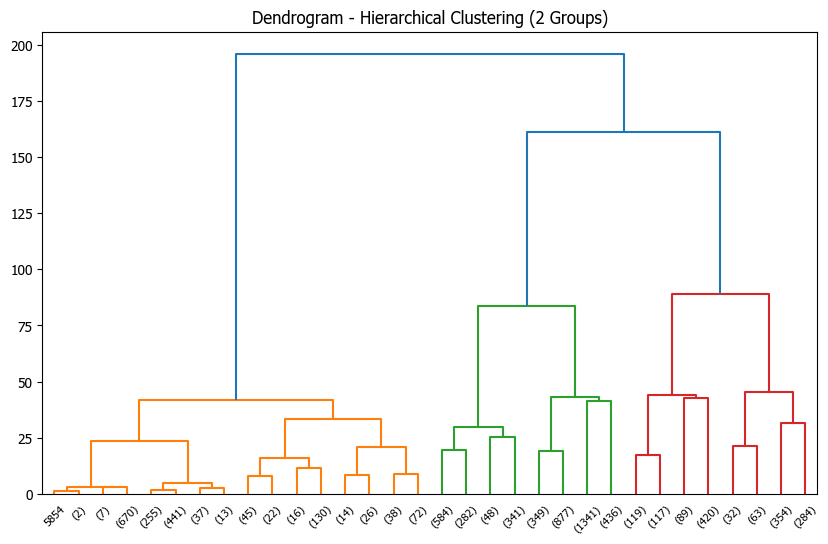

Cluster2
1    0.970375
2    0.855649
Name: Dead, dtype: float64


In [71]:
# Hierarchical Clustering (2 กลุ่ม)
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# ใช้วิธี Ward สำหรับการรวมกลุ่ม (ลด Variance)
Z = linkage(X_scaled, method='ward')

# กำหนดให้แบ่ง 2 กลุ่ม
cluster_labels = fcluster(Z, 2, criterion='maxclust')
df['Cluster2'] = cluster_labels

# Plot Dendrogram (อธิบายในงานวิจัยได้)
plt.figure(figsize=(10, 6))
plt.title("Dendrogram - Hierarchical Clustering (2 Groups)")
dendrogram(Z, truncate_mode='level', p=4)
plt.show()

print(df.groupby('Cluster2')['Dead'].mean())


In [72]:
# วิเคราะห์
survival_summary = df.groupby('Cluster2')[['RTS','ISS','Ais3','Dead']].mean()
count_table = df.groupby('Cluster2')['Dead'].value_counts(normalize=True) * 100

print("\n📌 ค่าเฉลี่ยของตัวแปรสำคัญในแต่ละคลัสเตอร์:")
print(survival_summary)

print("\n⚰️ สัดส่วนการเสียชีวิต (%) ในแต่ละคลัสเตอร์:")
print(count_table)



📌 ค่าเฉลี่ยของตัวแปรสำคัญในแต่ละคลัสเตอร์:
               RTS        ISS      Ais3      Dead
Cluster2                                         
1         7.343220   2.808832  0.757965  0.970375
2         6.803757  16.202232  2.043236  0.855649

⚰️ สัดส่วนการเสียชีวิต (%) ในแต่ละคลัสเตอร์:
Cluster2  Dead
1         1       97.037451
          0        2.962549
2         1       85.564854
          0       14.435146
Name: proportion, dtype: float64
